In [ ]:
# Instalar ultralytics (asegúrate de haber ejecutado esta celda antes)
!pip install ultralytics

# Importar YOLO y comprobar la instalación
from ultralytics import YOLO

# Verificar la instalación (sin `checks()`)
!yolo help

import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 35.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

    Arguments received: ['yolo', 'help']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'detect', 'obb', 'classify', 'segment', 'pose'}
                MODE (required) is one of {'val', 'benchmark', 'track', 'train', 'export', 'predict'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil

In [ ]:
# Ruta a los datos en Google Drive
base_path = "/content/drive/MyDrive/YOLOv8/datasets"

In [ ]:
# Combinar carpetas de imágenes y etiquetas para entrenamiento
for category in ['train', 'val']:
    for subfolder in ['correct', 'incorrect']:
        images_src = os.path.join(base_path, category, 'images', subfolder)
        labels_src = os.path.join(base_path, category, 'labels', subfolder)
        images_dst = os.path.join(base_path, category, 'images')
        labels_dst = os.path.join(base_path, category, 'labels')

        if os.path.exists(images_src):
            for file in os.listdir(images_src):
                shutil.move(os.path.join(images_src, file), images_dst)
        if os.path.exists(labels_src):
            for file in os.listdir(labels_src):
                shutil.move(os.path.join(labels_src, file), labels_dst)

In [ ]:
# Ruta base donde están los archivos de etiquetas
train_labels_path = "/content/drive/MyDrive/YOLOv8/datasets/train/labels"
val_labels_path = "/content/drive/MyDrive/YOLOv8/datasets/val/labels"

In [ ]:
# Función para obtener todas las clases utilizadas
def get_classes_from_labels(labels_path):
    classes = set()
    for file in os.listdir(labels_path):
        if file.endswith(".txt"):  # Asegúrate de solo leer archivos .txt
            with open(os.path.join(labels_path, file), 'r') as f:
                for line in f:
                    class_id = int(line.split()[0])  # La primera columna es la clase
                    classes.add(class_id)
    return classes

In [ ]:
# Obtener clases únicas en el conjunto de entrenamiento y validación
train_classes = get_classes_from_labels(train_labels_path)
val_classes = get_classes_from_labels(val_labels_path)

In [ ]:
# Combinar todas las clases detectadas
all_classes = sorted(train_classes.union(val_classes))

print("Clases detectadas en el conjunto de entrenamiento:", sorted(train_classes))
print("Clases detectadas en el conjunto de validación:", sorted(val_classes))
print("Total de clases detectadas:", len(all_classes))
print("Clases detectadas (ordenadas):", all_classes)

Clases detectadas en el conjunto de entrenamiento: [0, 1, 2, 3, 4]
Clases detectadas en el conjunto de validación: [0, 1, 2, 3, 4]
Total de clases detectadas: 5
Clases detectadas (ordenadas): [0, 1, 2, 3, 4]


In [ ]:
# Generar un archivo dataset.yaml
dataset_yaml = f"""
train: /content/drive/MyDrive/YOLOv8/datasets/train/images
val: /content/drive/MyDrive/YOLOv8/datasets/val/images

nc: {len(all_classes)}
names: {["Clase_" + str(cls) for cls in all_classes]}  # Aquí puedes reemplazar con nombres reales si los conoces
"""

In [ ]:
# Guardar el archivo dataset.yaml
yaml_path = "/content/drive/MyDrive/YOLOv8/dataset.yaml"
with open(yaml_path, 'w', encoding='utf-8') as f: # Specify encoding as 'utf-8'
    f.write(dataset_yaml)

In [ ]:
print(f"\nArchivo dataset.yaml generado en: {yaml_path}")
print("\nContenido sugerido para dataset.yaml:")
print(dataset_yaml)


Archivo dataset.yaml generado en: /content/drive/MyDrive/YOLOv8/dataset.yaml

Contenido sugerido para dataset.yaml:

train: /content/drive/MyDrive/YOLOv8/datasets/train/images
val: /content/drive/MyDrive/YOLOv8/datasets/val/images

nc: 5
names: ['Clase_0', 'Clase_1', 'Clase_2', 'Clase_3', 'Clase_4']  # Aquí puedes reemplazar con nombres reales si los conoces



In [ ]:
# Entrenar YOLOv8
from ultralytics import YOLO

# Crear un modelo desde cero o cargar uno preentrenado
model = YOLO("yolov8m.pt")  # Puedes usar yolov8n.pt para un modelo más pequeño

# Entrenar el modelo
model.train(
    data="/content/drive/MyDrive/YOLOv8/dataset.yaml",  # Ruta al archivo dataset.yaml
    epochs=100,
    batch=8,
    imgsz=640,
    optimizer="AdamW",
    cos_lr=True
)


100%|██████████| 49.7M/49.7M [00:00<00:00, 580MB/s]


Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/YOLOv8/dataset.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

100%|██████████| 755k/755k [00:00<00:00, 71.9MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 315MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/YOLOv8/datasets/train/labels.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 220, len(boxes) = 2000. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/YOLOv8/datasets/val/labels.cache... 101 images, 0 backgrounds, 0 corrupt: 100%|██████████| 101/101 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.74G      3.239      5.285       1.89         63        640: 100%|██████████| 50/50 [00:16<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.17it/s]

                   all        101        505          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.72G      3.245      3.583      1.766         81        640: 100%|██████████| 50/50 [00:12<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.60it/s]

                   all        101        505          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       3.6G      3.201      3.432      1.761         85        640: 100%|██████████| 50/50 [00:12<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.59it/s]

                   all        101        505          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.71G      3.079       3.27      1.759         81        640: 100%|██████████| 50/50 [00:12<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.65it/s]

                   all        101        505          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.71G      3.094      3.132      1.725         53        640: 100%|██████████| 50/50 [00:12<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.18it/s]

                   all        101        505      0.224     0.0457    0.00471    0.00106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.71G      2.975       2.94      1.633         87        640: 100%|██████████| 50/50 [00:12<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.07it/s]

                   all        101        505     0.0465       0.23     0.0477     0.0124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.71G      2.894      2.662      1.637         68        640: 100%|██████████| 50/50 [00:12<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.50it/s]

                   all        101        505      0.208       0.26      0.177     0.0503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.67G       2.88      2.632      1.578         38        640: 100%|██████████| 50/50 [00:13<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.43it/s]

                   all        101        505      0.363      0.229      0.158     0.0425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.71G      2.824       2.55      1.608         61        640: 100%|██████████| 50/50 [00:13<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]

                   all        101        505      0.789      0.143      0.178     0.0513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.67G      2.773      2.338       1.53         67        640: 100%|██████████| 50/50 [00:13<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]

                   all        101        505      0.626       0.21      0.199     0.0626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.68G      2.667      2.269      1.514         69        640: 100%|██████████| 50/50 [00:13<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.43it/s]

                   all        101        505      0.265      0.315      0.272     0.0852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.72G      2.594      2.096      1.505         91        640: 100%|██████████| 50/50 [00:13<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.29it/s]

                   all        101        505      0.268       0.34      0.286     0.0882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.69G      2.536      1.988      1.463         63        640: 100%|██████████| 50/50 [00:13<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.54it/s]

                   all        101        505      0.238      0.216      0.168     0.0561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.68G      2.491      1.979       1.48         47        640: 100%|██████████| 50/50 [00:13<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.35it/s]

                   all        101        505      0.507      0.454      0.438      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       3.7G      2.522      1.911      1.451         36        640: 100%|██████████| 50/50 [00:13<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.33it/s]

                   all        101        505      0.381      0.395      0.358      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.68G      2.461       1.82      1.408         52        640: 100%|██████████| 50/50 [00:13<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.48it/s]

                   all        101        505      0.407      0.394      0.331     0.0989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.71G      2.366      1.716      1.407         55        640: 100%|██████████| 50/50 [00:13<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.34it/s]

                   all        101        505      0.416      0.429      0.371       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.71G      2.369      1.622      1.385         68        640: 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.33it/s]

                   all        101        505      0.482      0.453      0.445      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       3.7G      2.417      1.686      1.395         33        640: 100%|██████████| 50/50 [00:13<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]

                   all        101        505      0.431      0.495      0.418      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.68G      2.399      1.628      1.385         54        640: 100%|██████████| 50/50 [00:13<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.34it/s]

                   all        101        505      0.481      0.556      0.501      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.68G      2.367      1.589      1.379         41        640: 100%|██████████| 50/50 [00:13<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.31it/s]

                   all        101        505      0.586      0.398      0.367      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.71G      2.402      1.647      1.353         66        640: 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.27it/s]

                   all        101        505      0.356      0.471      0.401      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.68G      2.331      1.555      1.374         73        640: 100%|██████████| 50/50 [00:13<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.30it/s]

                   all        101        505      0.459      0.378      0.395      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.69G      2.322      1.548      1.361         57        640: 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]

                   all        101        505      0.566      0.592      0.594      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       3.7G       2.23      1.415      1.316         74        640: 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.34it/s]

                   all        101        505      0.523      0.522       0.53      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       3.7G      2.224      1.407      1.323         32        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.44it/s]

                   all        101        505      0.643      0.612      0.662      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.69G      2.176       1.37      1.317         76        640: 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.52it/s]

                   all        101        505      0.634      0.585      0.633      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.68G      2.228      1.382        1.3         77        640: 100%|██████████| 50/50 [00:13<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.44it/s]

                   all        101        505      0.691      0.623      0.684      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.68G      2.207      1.357      1.315         61        640: 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.43it/s]

                   all        101        505      0.702      0.673      0.701      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.69G       2.23      1.293      1.298         41        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.30it/s]

                   all        101        505      0.727      0.654      0.708      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.69G      2.208      1.303      1.316         49        640: 100%|██████████| 50/50 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.51it/s]

                   all        101        505      0.635       0.67      0.675      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.68G      2.175      1.316      1.303         50        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.48it/s]

                   all        101        505      0.602      0.678      0.662      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       3.7G      2.186       1.29      1.328         64        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.51it/s]

                   all        101        505       0.55      0.597      0.542      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.68G      2.133      1.273      1.309         53        640: 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.50it/s]

                   all        101        505      0.647      0.607      0.615      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.66G      2.164      1.243      1.306         30        640: 100%|██████████| 50/50 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.52it/s]

                   all        101        505      0.706      0.632      0.633      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.67G      2.106      1.217      1.264         77        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]

                   all        101        505      0.739      0.685      0.715      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.68G       2.12      1.208       1.24         81        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.44it/s]

                   all        101        505      0.674      0.628      0.632      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.67G      2.099      1.207      1.234         61        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]

                   all        101        505      0.712      0.712      0.721      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.67G      2.022      1.143      1.253         76        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.43it/s]

                   all        101        505      0.747      0.735      0.773      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.68G      2.056      1.184      1.265         53        640: 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.51it/s]

                   all        101        505      0.778      0.625      0.667      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.65G       2.08       1.22      1.298         85        640: 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.51it/s]

                   all        101        505      0.734      0.726      0.735      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.67G      2.019      1.156      1.249         63        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.39it/s]

                   all        101        505      0.714      0.744      0.737      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.68G      2.002       1.11      1.227         70        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.45it/s]

                   all        101        505      0.746      0.804      0.779      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.69G      1.986      1.112      1.251         51        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.49it/s]

                   all        101        505       0.79      0.765      0.751      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.66G      2.053      1.122       1.24         60        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]

                   all        101        505       0.75      0.796      0.781      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.67G      2.036       1.13      1.256         88        640: 100%|██████████| 50/50 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.44it/s]

                   all        101        505      0.817      0.755      0.801      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.66G      2.003      1.103      1.207         63        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]

                   all        101        505      0.737      0.765      0.767       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.67G      1.999      1.085      1.213         73        640: 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.44it/s]

                   all        101        505      0.753      0.681      0.705      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.69G      1.934      1.035      1.219         61        640: 100%|██████████| 50/50 [00:13<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.08it/s]

                   all        101        505      0.823      0.774      0.799      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       3.7G      1.956      1.053      1.209         44        640: 100%|██████████| 50/50 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.43it/s]

                   all        101        505      0.773      0.723      0.728      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.68G      1.917      1.022      1.218         89        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.24it/s]

                   all        101        505      0.746      0.714      0.756      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.71G      1.938      1.046      1.218         41        640: 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.29it/s]

                   all        101        505      0.751      0.719      0.745      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.68G       1.92      1.004      1.206         89        640: 100%|██████████| 50/50 [00:13<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]

                   all        101        505      0.706      0.779      0.787      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       3.7G      1.932      1.031      1.244         36        640: 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.39it/s]

                   all        101        505      0.795       0.82       0.84      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.66G      1.915      1.051      1.195         76        640: 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]

                   all        101        505      0.782      0.832      0.844      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.71G      1.907     0.9978       1.19         67        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]

                   all        101        505      0.807      0.802      0.816      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.67G       1.87     0.9968      1.175         52        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]

                   all        101        505      0.759      0.773      0.807      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.69G      1.871     0.9907      1.196         73        640: 100%|██████████| 50/50 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.39it/s]

                   all        101        505      0.803       0.75      0.805      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.71G      1.881     0.9544      1.172         69        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.39it/s]

                   all        101        505       0.78      0.793      0.801       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.68G      1.895     0.9777      1.193         36        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.54it/s]

                   all        101        505       0.81      0.788      0.813      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.68G      1.852     0.9687      1.185         59        640: 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.50it/s]

                   all        101        505      0.816      0.812       0.83      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.69G      1.811     0.9362      1.146         59        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.46it/s]

                   all        101        505      0.798      0.741      0.784      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       3.7G       1.83     0.9245      1.188         87        640: 100%|██████████| 50/50 [00:13<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]

                   all        101        505      0.814      0.838      0.834      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       3.7G      1.795       0.92      1.157         95        640: 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]

                   all        101        505      0.809      0.804      0.857      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.69G      1.811     0.9168       1.17         70        640: 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]

                   all        101        505      0.831      0.872      0.853      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.69G      1.815     0.9195      1.173         64        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.35it/s]

                   all        101        505      0.789      0.856      0.846      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.68G       1.79     0.9158      1.166         53        640: 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.51it/s]

                   all        101        505      0.867       0.84       0.87      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       3.7G      1.779     0.8967      1.154         79        640: 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.48it/s]

                   all        101        505      0.828      0.814       0.83      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       3.7G      1.745     0.8925      1.153         71        640: 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.49it/s]

                   all        101        505      0.803      0.812      0.831      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.71G      1.766     0.8687      1.151         62        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.50it/s]

                   all        101        505       0.85      0.838      0.847      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.71G      1.746     0.8959      1.126         63        640: 100%|██████████| 50/50 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]

                   all        101        505      0.839       0.81      0.839      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       3.7G      1.753     0.8815      1.157         78        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.53it/s]

                   all        101        505      0.854      0.809      0.846      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       3.7G      1.746     0.8623      1.149         65        640: 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.39it/s]

                   all        101        505       0.85      0.845      0.858      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       3.7G      1.744     0.8551      1.134         75        640: 100%|██████████| 50/50 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.54it/s]

                   all        101        505      0.836      0.834      0.839      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.69G      1.702      0.857      1.168         60        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.50it/s]

                   all        101        505      0.835      0.847      0.832      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       3.7G      1.698      0.836      1.127         87        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]

                   all        101        505      0.822      0.853       0.83      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.71G      1.736     0.8724      1.141         58        640: 100%|██████████| 50/50 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]

                   all        101        505      0.822      0.859      0.845      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.71G      1.676     0.8274      1.111         62        640: 100%|██████████| 50/50 [00:13<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]

                   all        101        505      0.848      0.855      0.869      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.67G      1.672     0.8097      1.107         59        640: 100%|██████████| 50/50 [00:13<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]

                   all        101        505      0.854      0.822      0.853      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.67G      1.692     0.8228       1.13         56        640: 100%|██████████| 50/50 [00:13<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.37it/s]

                   all        101        505      0.847      0.856      0.858      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.68G      1.635      0.823      1.113         64        640: 100%|██████████| 50/50 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.39it/s]

                   all        101        505      0.846      0.841      0.853      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.67G      1.688     0.8012      1.108         79        640: 100%|██████████| 50/50 [00:13<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.29it/s]

                   all        101        505      0.823      0.841      0.832      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.67G      1.663     0.8287      1.117         50        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.30it/s]

                   all        101        505      0.811      0.829      0.818      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.67G      1.692     0.8427      1.121         81        640: 100%|██████████| 50/50 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.28it/s]

                   all        101        505      0.817      0.818      0.839      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       3.7G      1.677     0.8337      1.099         58        640: 100%|██████████| 50/50 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.31it/s]

                   all        101        505      0.799      0.828      0.819      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.68G      1.631     0.8045      1.127         69        640: 100%|██████████| 50/50 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.33it/s]

                   all        101        505      0.795      0.816      0.817      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.68G      1.634     0.7932      1.101         35        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.35it/s]

                   all        101        505      0.818       0.82      0.831      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.69G      1.629     0.7967      1.119         85        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.37it/s]

                   all        101        505      0.823      0.818      0.828       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.67G      1.672     0.7993      1.135         50        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.53it/s]

                   all        101        505      0.846      0.805      0.834      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.71G      1.644     0.8156      1.127         84        640: 100%|██████████| 50/50 [00:13<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.49it/s]

                   all        101        505      0.795      0.842      0.837      0.351


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.68G      1.619     0.7899       1.12         40        640: 100%|██████████| 50/50 [00:14<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.43it/s]

                   all        101        505       0.79      0.843      0.825      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       3.7G       1.61     0.7642       1.15         35        640: 100%|██████████| 50/50 [00:13<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.50it/s]

                   all        101        505      0.793      0.834      0.824      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.71G      1.594      0.752      1.128         40        640: 100%|██████████| 50/50 [00:13<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.44it/s]

                   all        101        505       0.81      0.836      0.833       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       3.7G      1.597     0.7748      1.129         40        640: 100%|██████████| 50/50 [00:13<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.56it/s]

                   all        101        505      0.807      0.819      0.818      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.69G      1.576     0.7493       1.13         40        640: 100%|██████████| 50/50 [00:13<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.46it/s]

                   all        101        505      0.813       0.82      0.821      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.68G      1.578     0.7529      1.134         40        640: 100%|██████████| 50/50 [00:13<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.45it/s]

                   all        101        505      0.819      0.829      0.835      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       3.7G      1.573      0.753      1.125         40        640: 100%|██████████| 50/50 [00:13<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.52it/s]

                   all        101        505      0.808      0.829       0.83      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       3.7G      1.562     0.7712      1.136         40        640: 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.51it/s]

                   all        101        505      0.809      0.841      0.838      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       3.7G      1.563     0.7473      1.139         40        640: 100%|██████████| 50/50 [00:13<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.56it/s]

                   all        101        505      0.817      0.839      0.841      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       3.7G      1.555     0.7411      1.131         40        640: 100%|██████████| 50/50 [00:13<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.51it/s]

                   all        101        505      0.815      0.831      0.831      0.354



100 epochs completed in 0.439 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.43it/s]


                   all        101        505      0.845      0.859      0.868      0.364
               Clase_0        101        101      0.869      0.911      0.885      0.336
               Clase_1        100        100      0.919      0.905      0.948      0.462
               Clase_2        101        102      0.873      0.873      0.905      0.296
               Clase_3        101        101      0.708      0.624      0.646      0.183
               Clase_4        101        101      0.855       0.98      0.954      0.545
Speed: 0.2ms preprocess, 8.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c6ceee90c70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [ ]:
# Validar el modelo entrenado
metrics = model.val()
print(metrics)

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/drive/MyDrive/YOLOv8/datasets/val/labels.cache... 101 images, 0 backgrounds, 0 corrupt: 100%|██████████| 101/101 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.92it/s]


                   all        101        505      0.843      0.858      0.868      0.364
               Clase_0        101        101       0.87      0.911      0.885      0.333
               Clase_1        100        100      0.919      0.905      0.949      0.464
               Clase_2        101        102      0.857       0.88      0.903      0.297
               Clase_3        101        101      0.721      0.615      0.649      0.188
               Clase_4        101        101       0.85       0.98      0.954      0.537
Speed: 0.2ms preprocess, 22.5ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c6c97f7c460>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_resu

In [ ]:
# Realizar predicciones en imágenes de validación
results = model.predict(
    source="/content/drive/MyDrive/YOLOv8/datasets/val/images",
    save=True  # Guarda las predicciones en imágenes
)


image 1/101 /content/drive/MyDrive/YOLOv8/datasets/val/images/ok_149.jpg: 640x608 1 Clase_0, 1 Clase_1, 1 Clase_2, 1 Clase_3, 1 Clase_4, 46.8ms
image 2/101 /content/drive/MyDrive/YOLOv8/datasets/val/images/ok_150.jpg: 640x640 1 Clase_0, 1 Clase_1, 1 Clase_2, 2 Clase_3s, 1 Clase_4, 37.4ms
image 3/101 /content/drive/MyDrive/YOLOv8/datasets/val/images/ok_151.jpg: 640x640 2 Clase_0s, 1 Clase_1, 1 Clase_2, 3 Clase_3s, 1 Clase_4, 36.2ms
image 4/101 /content/drive/MyDrive/YOLOv8/datasets/val/images/ok_152.jpg: 576x640 2 Clase_0s, 1 Clase_1, 1 Clase_2, 1 Clase_3, 1 Clase_4, 41.9ms
image 5/101 /content/drive/MyDrive/YOLOv8/datasets/val/images/ok_153.jpg: 544x640 2 Clase_0s, 1 Clase_1, 1 Clase_2, 2 Clase_4s, 40.9ms
image 6/101 /content/drive/MyDrive/YOLOv8/datasets/val/images/ok_154.jpg: 512x640 1 Clase_0, 1 Clase_1, 2 Clase_4s, 42.6ms
image 7/101 /content/drive/MyDrive/YOLOv8/datasets/val/images/ok_155.jpg: 480x640 1 Clase_0, 1 Clase_1, 1 Clase_2, 2 Clase_4s, 44.3ms
image 8/101 /content/drive/

In [ ]:
# Mostrar los resultados
from IPython.display import Image, display
import glob

In [ ]:
# Mostrar las primeras 5 imágenes con predicciones
predicted_images = glob.glob("runs/detect/predict/*.jpg")
for image_path in predicted_images[:5]:
    display(Image(filename=image_path))

In [ ]:
def validar_conexiones(predicciones, posiciones_correctas):
    """
    Validar si las conexiones son correctas basado en las predicciones.

    predicciones: lista de objetos detectados
    posiciones_correctas: diccionario con las posiciones esperadas para cada cable
    """
    for prediccion in predicciones:
        clase = prediccion['class']  # Índice de clase
        bbox = prediccion['bbox']  # [x_center, y_center, width, height]

        if clase not in posiciones_correctas:
            return "Incorrecto"
        if not bbox_esta_en_posicion(bbox, posiciones_correctas[clase]):
            return "Incorrecto"
    return "Correcto"

# Implementa lógica para definir las posiciones correctas y verificar


In [ ]:
# Ruta a las etiquetas de entrenamiento
label_path = "/content/drive/MyDrive/YOLOv8/datasets/train/labels"

In [ ]:
# Diccionario para mapear índices a nombres
index_to_name = {
    0: "Negro",
    1: "Azul",
    2: "Amarillo",
    3: "Marron",
    4: "Rojo"
}

In [ ]:
# Detectar clases en los archivos
detected_classes = {}

for file_name in os.listdir(label_path):
    if file_name.endswith(".txt"):
        with open(os.path.join(label_path, file_name), 'r') as file:
            for line in file:
                class_id = int(line.split()[0])
                if class_id not in detected_classes:
                    detected_classes[class_id] = index_to_name.get(class_id, "Unknown")

In [ ]:
print("Clases detectadas en las etiquetas:")
for class_id, class_name in detected_classes.items():
    print(f"Índice {class_id}: {class_name}")

Clases detectadas en las etiquetas:
Índice 4: Rojo
Índice 2: Amarillo
Índice 1: Azul
Índice 3: Marron
Índice 0: Negro


In [ ]:
# Cargar resultados desde el archivo CSV generado
results_path = "/content/runs/detect/train/results.csv"
results_df = pd.read_csv(results_path)

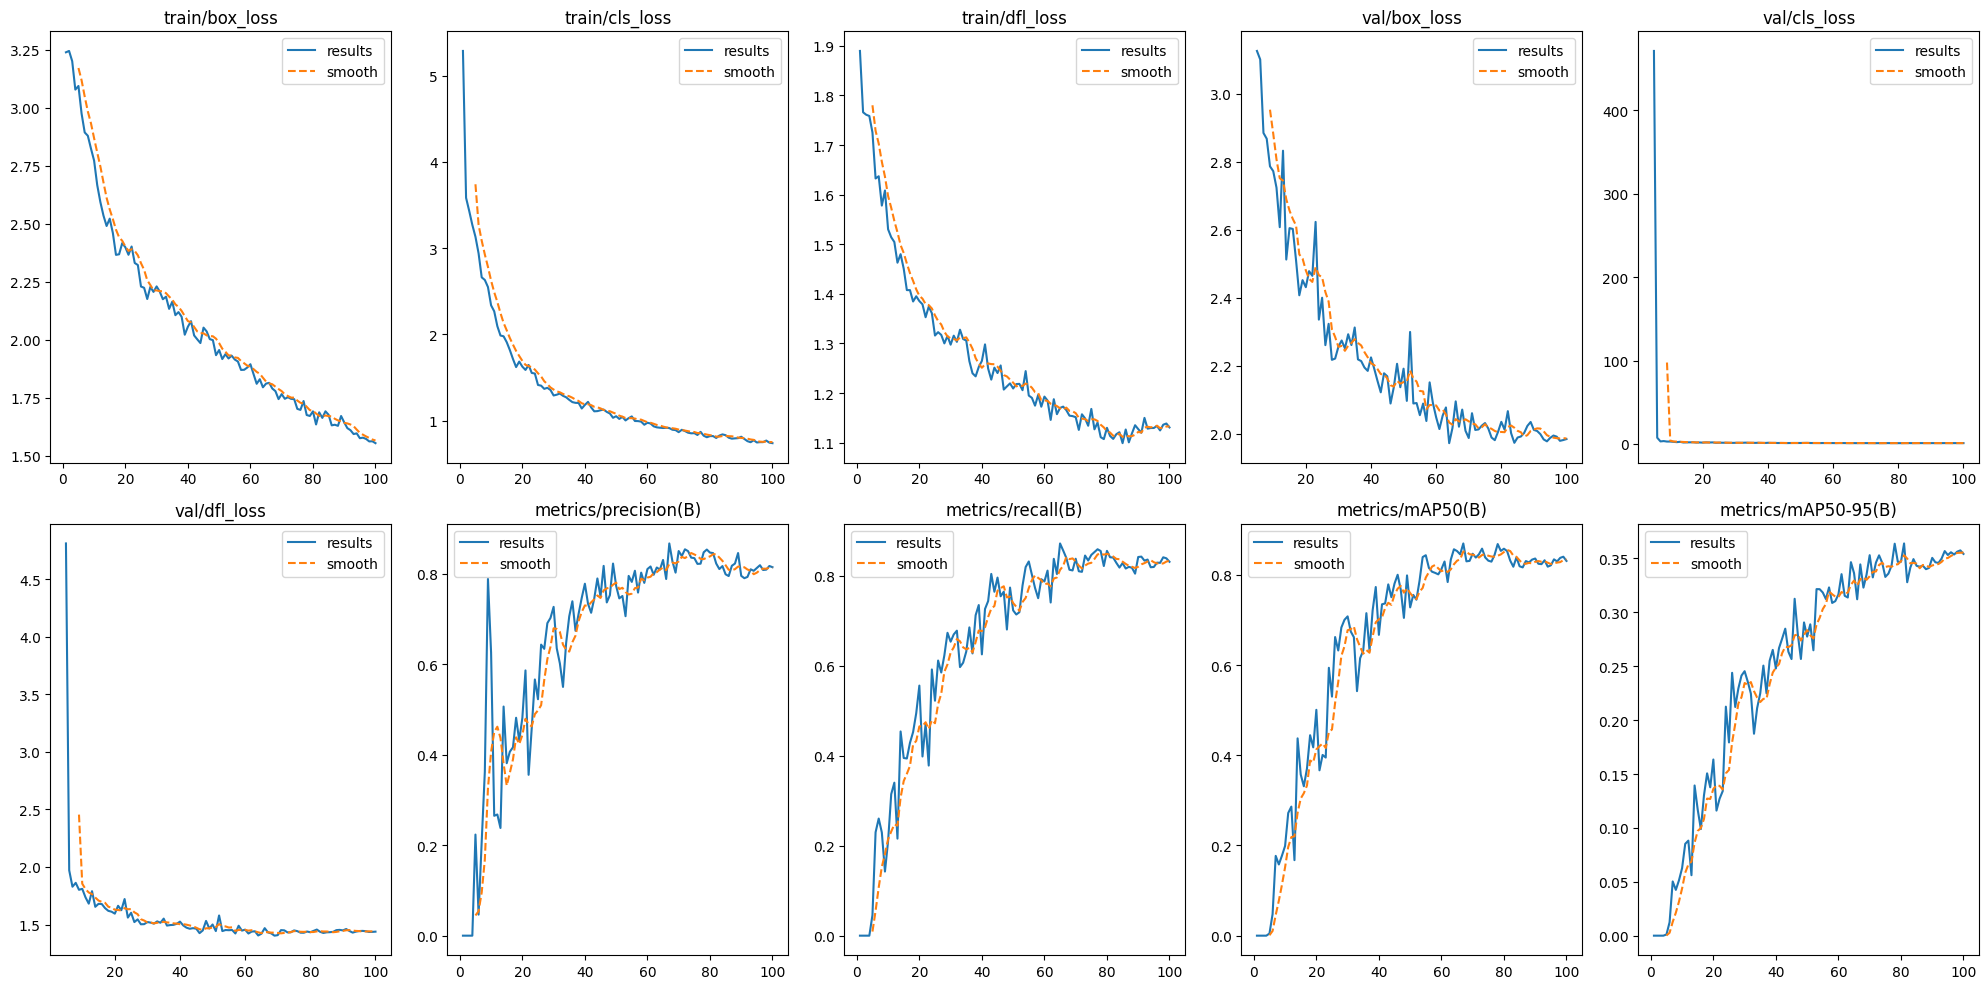

In [ ]:
import matplotlib.pyplot as plt

# Columnas de interés
columns = [
    'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
    'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
    'metrics/precision(B)', 'metrics/recall(B)',
    'metrics/mAP50(B)', 'metrics/mAP50-95(B)'
]

# Crear una figura y una cuadrícula de subplots (2 filas, 5 columnas)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()  # Aplanar los subplots para iterar sobre ellos

# Iterar sobre las columnas y graficar
for i, col in enumerate(columns):
    axes[i].plot(results_df.index + 1, results_df[col], label='results')  # Línea principal
    axes[i].plot(results_df.index + 1, results_df[col].rolling(window=5).mean(), linestyle='--', label='smooth')  # Suavizado
    axes[i].set_title(col)
    axes[i].legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()